In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from projectpreprocessing import plot_learning_curves, plot_foldwise_scores, plot_random_forest_feature_importance, plot_confusion_matrix

warnings.filterwarnings('ignore')

## Data Reading and Exploration

In [2]:
df = pd.read_csv('bankloan.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**Dataset Description :**

**ID** : ID of the customer.

**Age** : Age of the customer in years.

**Experience** : Amount of work experience in years.

**Income** : Amount of annual income (in thousands).

**Zipcode** : Postal code of the city in which the client lives.

**Family** : Number of family members.

**CCAvg** : Average monthly spending with the credit card (in thousands).

**Education** : Education level

    1 : Bachelor's degree
    2 : Master's degree
    3 : Advanced/Professional degree.

**Mortgage**: Value of home mortgage, if any (in thousands).

**Securities Account** : Does the customer have a securities account with the bank?

**CD Account** : Does the customer have a certificate of deposit account (CD) with the bank?

**Online** : Does the customer use the internet banking facilities?

**CreditCard** : Does the customer use a credit card issued by the bank?

**Personal Loan** : Did this customer accept the personal loan offered in the last campaign?

## Data Shape

In [4]:
df.shape

(5000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**General Dataset Overview** :

1.Dataset Size and Completeness:

    The dataset comprises 5000 entries, and there are no missing or null values present in any column (5000 non-null entries) which ensurees that the dataset is complete with no missing values.

Data Types and Column Structure:

    All columns in the dataset contain numeric data.
    
    The majority of columns are of integer type (int64), indicating whole numbers, such as ID, Age, Experience, Income, ZIP Code, Family, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, and CreditCard.
    
    One column, 'CCAvg', is represented as a floating-point number (float64), likely indicating fractional values for average credit card spending.
    
    All columns have normal data types, and there are no observed data types that seem abnormal or unexpected.

## Summary Statistics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP.Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal.Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observations** :

Age : Ranges from 23 to 67, with an average age of 45.34 and a moderate standard deviation of 11.46.

Experience: Contains values from -3 to 43 years. While the average experience is 20.10 years, some entries show negative experience,which detects a mistake or error, potentially will require data validation or cleansing.

Income : Displays wide income variability, ranging from 8 to 224. Average income is approximately 73.77, with a notable standard deviation of around 46.03, indicating a significant spread in income levels.

Family : Reflects family size with values ranging from 1 to 4 family members. The dataset's average family size is about 2.40, indicating most entries are from small to medium-sized families.

Mortgage :Reflects housing-related debt. Displays wide variability with an average mortgage amount of about 56.50 and a large standard deviation of approximately 101.71.

Personal Loan, Securities Account, CD Account, Online, CreditCard : Binary columns representing acceptance or possession of specific banking products or services.

### Exploratory Data Analysis

In [7]:
#Veriyfing that there are no duplicated ID's presented in the dataset to ensure correcteness
df['ID'].nunique()

5000

No Duplicated ID's Presented

In [8]:
#Considering the previous observations and summary, we've decided to drop the ZipCodes and ID columns 
#as they are not conducive for further analysis or predictive modeling.
df.drop(['ID','ZIP.Code'],axis=1,inplace=True)

In [9]:
#Analyzing the distribution of class counts within our target variable.
df['Personal.Loan'].value_counts()

Personal.Loan
0    4520
1     480
Name: count, dtype: int64

Among the bank's clients, a substantial majority, 4520, declined the offered personal loan, while only a smaller subset, roughly 500 individuals, accepted it.

This also reveals a significant bias toward a particular class (0), suggesting the potential necessity for further upsampling to enhance the model's performance.

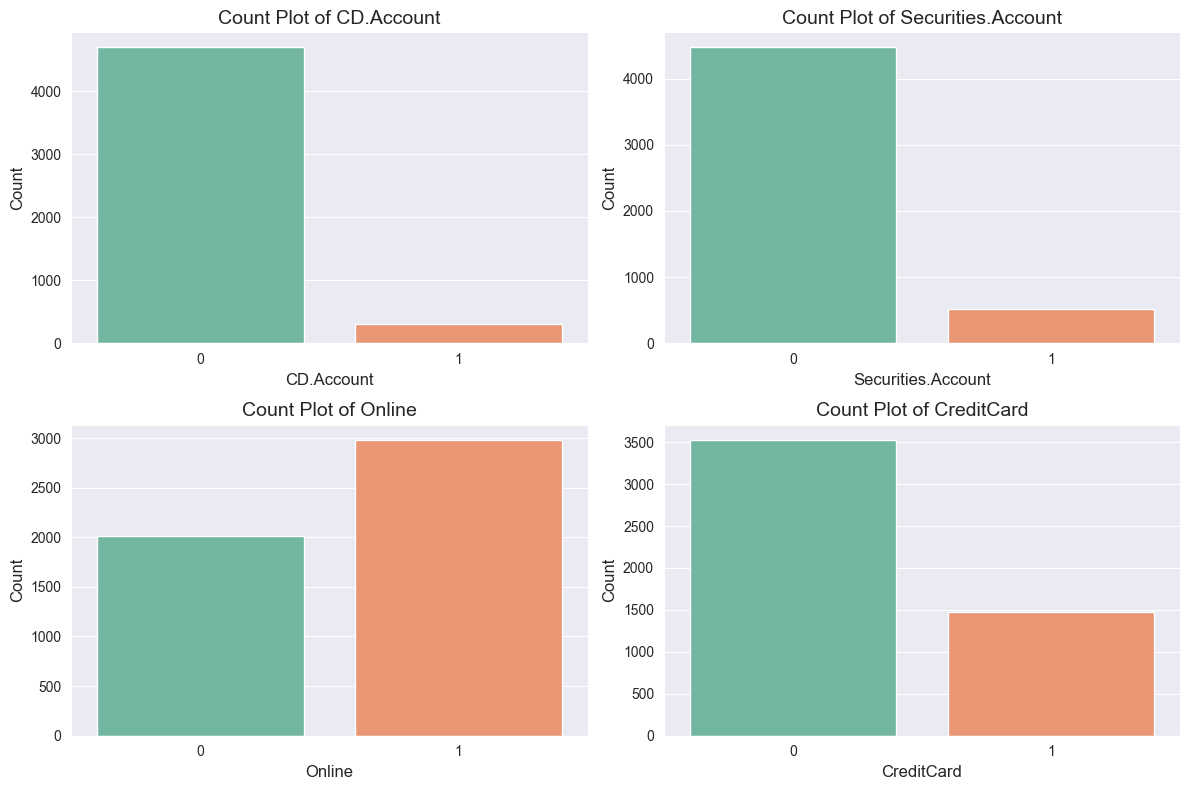

In [10]:
boolean_columns = [ 'CD.Account', 'Securities.Account', 'Online', 'CreditCard']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, col in enumerate(boolean_columns[:4]):
    sns.countplot(x=col, data=df, ax=axes[i//2, i%2], palette='Set2')
    axes[i//2, i%2].set_title(f'Count Plot of {col}', fontsize=14)
    axes[i//2, i%2].set_xlabel(col, fontsize=12)
    axes[i//2, i%2].set_ylabel('Count', fontsize=12)
    axes[i//2, i%2].tick_params(labelsize=10)

plt.tight_layout()
plt.show()

* Most clients at this bank don't have a CD account, which shows that this service is not widely used.


* There's also a lack of securities accounts among clients, hinting at low interest or participation in the bank's investment products.


* Many clients don't use the bank's credit cards, perhaps preferring other credit options or payment methods.


* On the flip side, a significant number of clients actively use the bank's online banking services, indicating a higher adoption rate for this service.


These observations suggests that the bank might need to reconsider or enhance its offerings in certain areas.


* There could be an opportunity to promote and make CD accounts more attractive to customers.


* The bank might need to review or promote its investment products to increase customer engagement.


* Exploring credit card features or benefits could motivate more clients to use the bank's credit cards.


* Utilizing and expanding the existing high usage of online banking services could significantly enhance overall customer satisfaction and convenience

In [11]:
df['Family'].value_counts()

Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64

The distribution of family members appears to be evenly represented within the dataset.

In [12]:
df['Education'].value_counts()

Education
1    2096
3    1501
2    1403
Name: count, dtype: int64

Majority of bank clients are of Bachleor's degree.

In [13]:
def rename_education(df):
    # Mapping education codes to degree names
    education_mapping = {
        1: 'Bachleor degree',
        2: 'Masters',
        3: 'Advanced/Professional'
    }

    # Calculate the mode education level for each 'Personal Loan' category
    mode_education = df.groupby('Personal.Loan')['Education'].agg(lambda x: x.mode().iloc[0])

    # Map education codes to degree names
    mode_education = mode_education.reset_index()
    mode_education['Education'] = mode_education['Education'].map(education_mapping)

    return mode_education

result = rename_education(df)
display(result)

,Personal.Loan,Education
0,0,Bachleor degree
1,1,Advanced/Professional


* Among the 500 individuals who accepted the bank's offered loans, a significant majority hold advanced degrees.


* The majority of customers who did not get the loan offer hold bachelor's degrees. This might suggest that they are predominantly undergraduates or individuals early in their careers, possibly explaining their lower incomes, which could be a reason for the declined loan offers.

## Correlation

In [14]:
correlation = df.corr()[['Personal.Loan']].sort_values(by='Personal.Loan', ascending=False)
display(correlation)

,Personal.Loan
Personal.Loan,1.000000
Income,0.502462
CCAvg,0.366889
CD.Account,0.316355
Mortgage,0.142095
Education,0.136722
Family,0.061367
Securities.Account,0.021954
Online,0.006278
CreditCard,0.002802


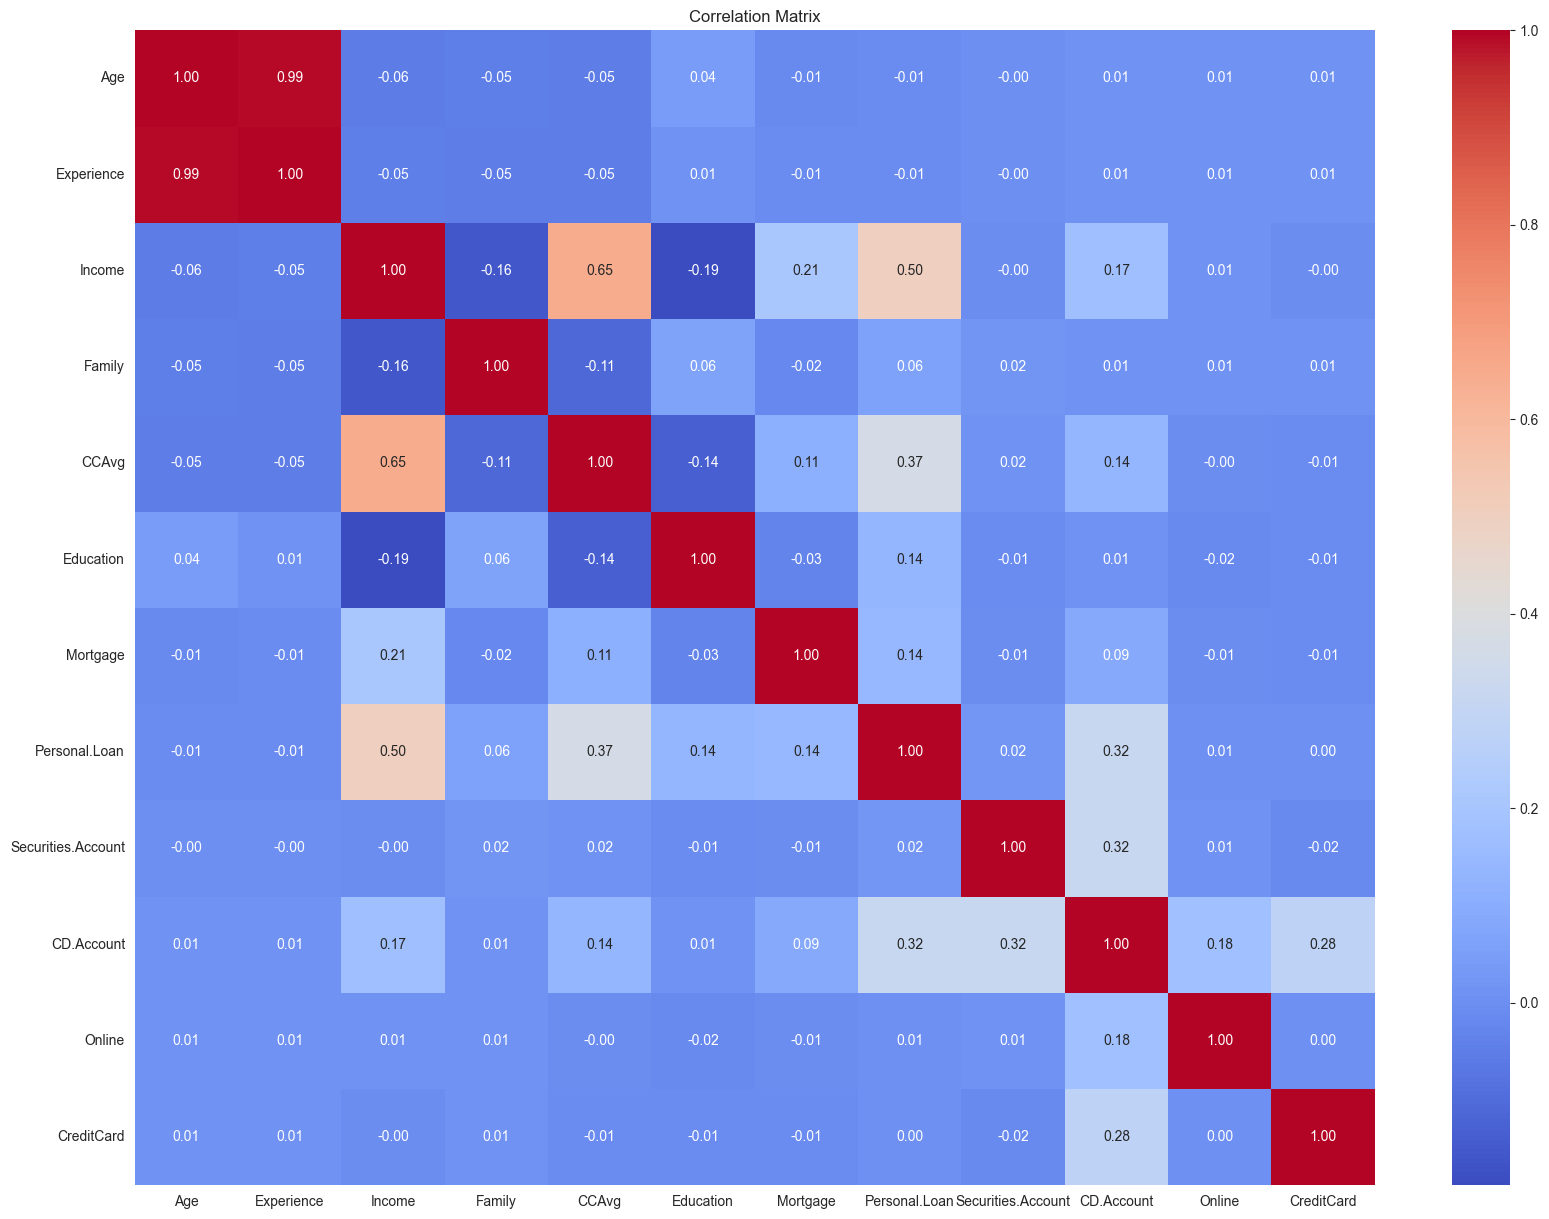

In [15]:
# Calculating the correlation matrix 
correlation_matrix_dropped = df.select_dtypes(include=['int64', 'float64']).corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix_dropped, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Based on the Correlation values with Target**:

* Strong Influences on Personal Loan Decision:

    * Higher income and average credit card spending show moderate positive correlations with taking a personal loan.
    
    * Having a certificate of deposit account also moderately influences opting for a personal loan.

* Weaker Influences:

    * Education, mortgage, family size, securities account, online usage, and owning a credit card display weaker, minimal, or almost negligible correlations with personal loan decisions.

    * Experience and age have weak negative correlations, indicating minor inverse influence on the outcome.

**Considering the Analysis and Domain Understanding** :

* Income, CCAvg, CD Account, and Mortgage values significantly influence predicting loan acceptance. These attributes showcase notable correlations, indicating a higher likelihood of accepting a personal loan among individuals with higher incomes, increased credit card spending, possession of a CD account, and substantial mortgage values.


* Despite the negative correlation, Age remains crucial for loan acceptance prediction. While very young or elderly individuals might face challenges in loan approval, those within the middle age range are more likely to be accepted for loans.


* Number of family members can be an influential factor. Applicants with larger families and stable incomes might qualify as potential candidates for loan acceptance.


* Conversely, columns such as Securities Account, Online, and CreditCard exhibit negligible correlations with loan acceptance. These features might not significantly contribute to predicting whether a person will be accepted for a loan or not.


* Experience holds a less influential role individually. However, when considered in conjunction with age, individuals with substantial experience and average age could be preferable candidates for loan acceptance.


This detailed conclusion sheds light on the main factors affecting loan acceptance and those with less impact. These insights aid in crafting a more accurate predictive model for loan approval.

## Data Preprocessing

### Wrong entries

During the initial examination of the dataset, an anomaly was identified within the 'Experience' column, uncovering instances with negative values. It's crucial to rectify this issue as part of the data preprocessing phase.

In [16]:
df[df['Experience'] < 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,2,7.20,1,0,0,1,0,0,1


Upon closer examination, it appears that a a lot of records of the dataset contains negative values in the Experience column, signifying potential anomalies or errors within the data. To address this, we will employ the absolute function to transform these values and handle this errors.

In [17]:
df['Experience'] = abs(df['Experience'])
df[df['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard


### Null Check

In [18]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

The dataset is clean and does not contain any missing or null values across its columns.

The absence of missing values ensures the dataset's cleanliness and completeness, providing a reliable foundation for analysis and modeling.


### Duplicate Check

In [19]:
df.duplicated().sum()

13

We've identified 13 duplicate rows within our dataset. These duplicates will be removed to maintain the data's integrity and reliability.

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

### Outliers And Skewness

In [22]:
columns = df.drop(['Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard'],axis=1)

#### Outliers

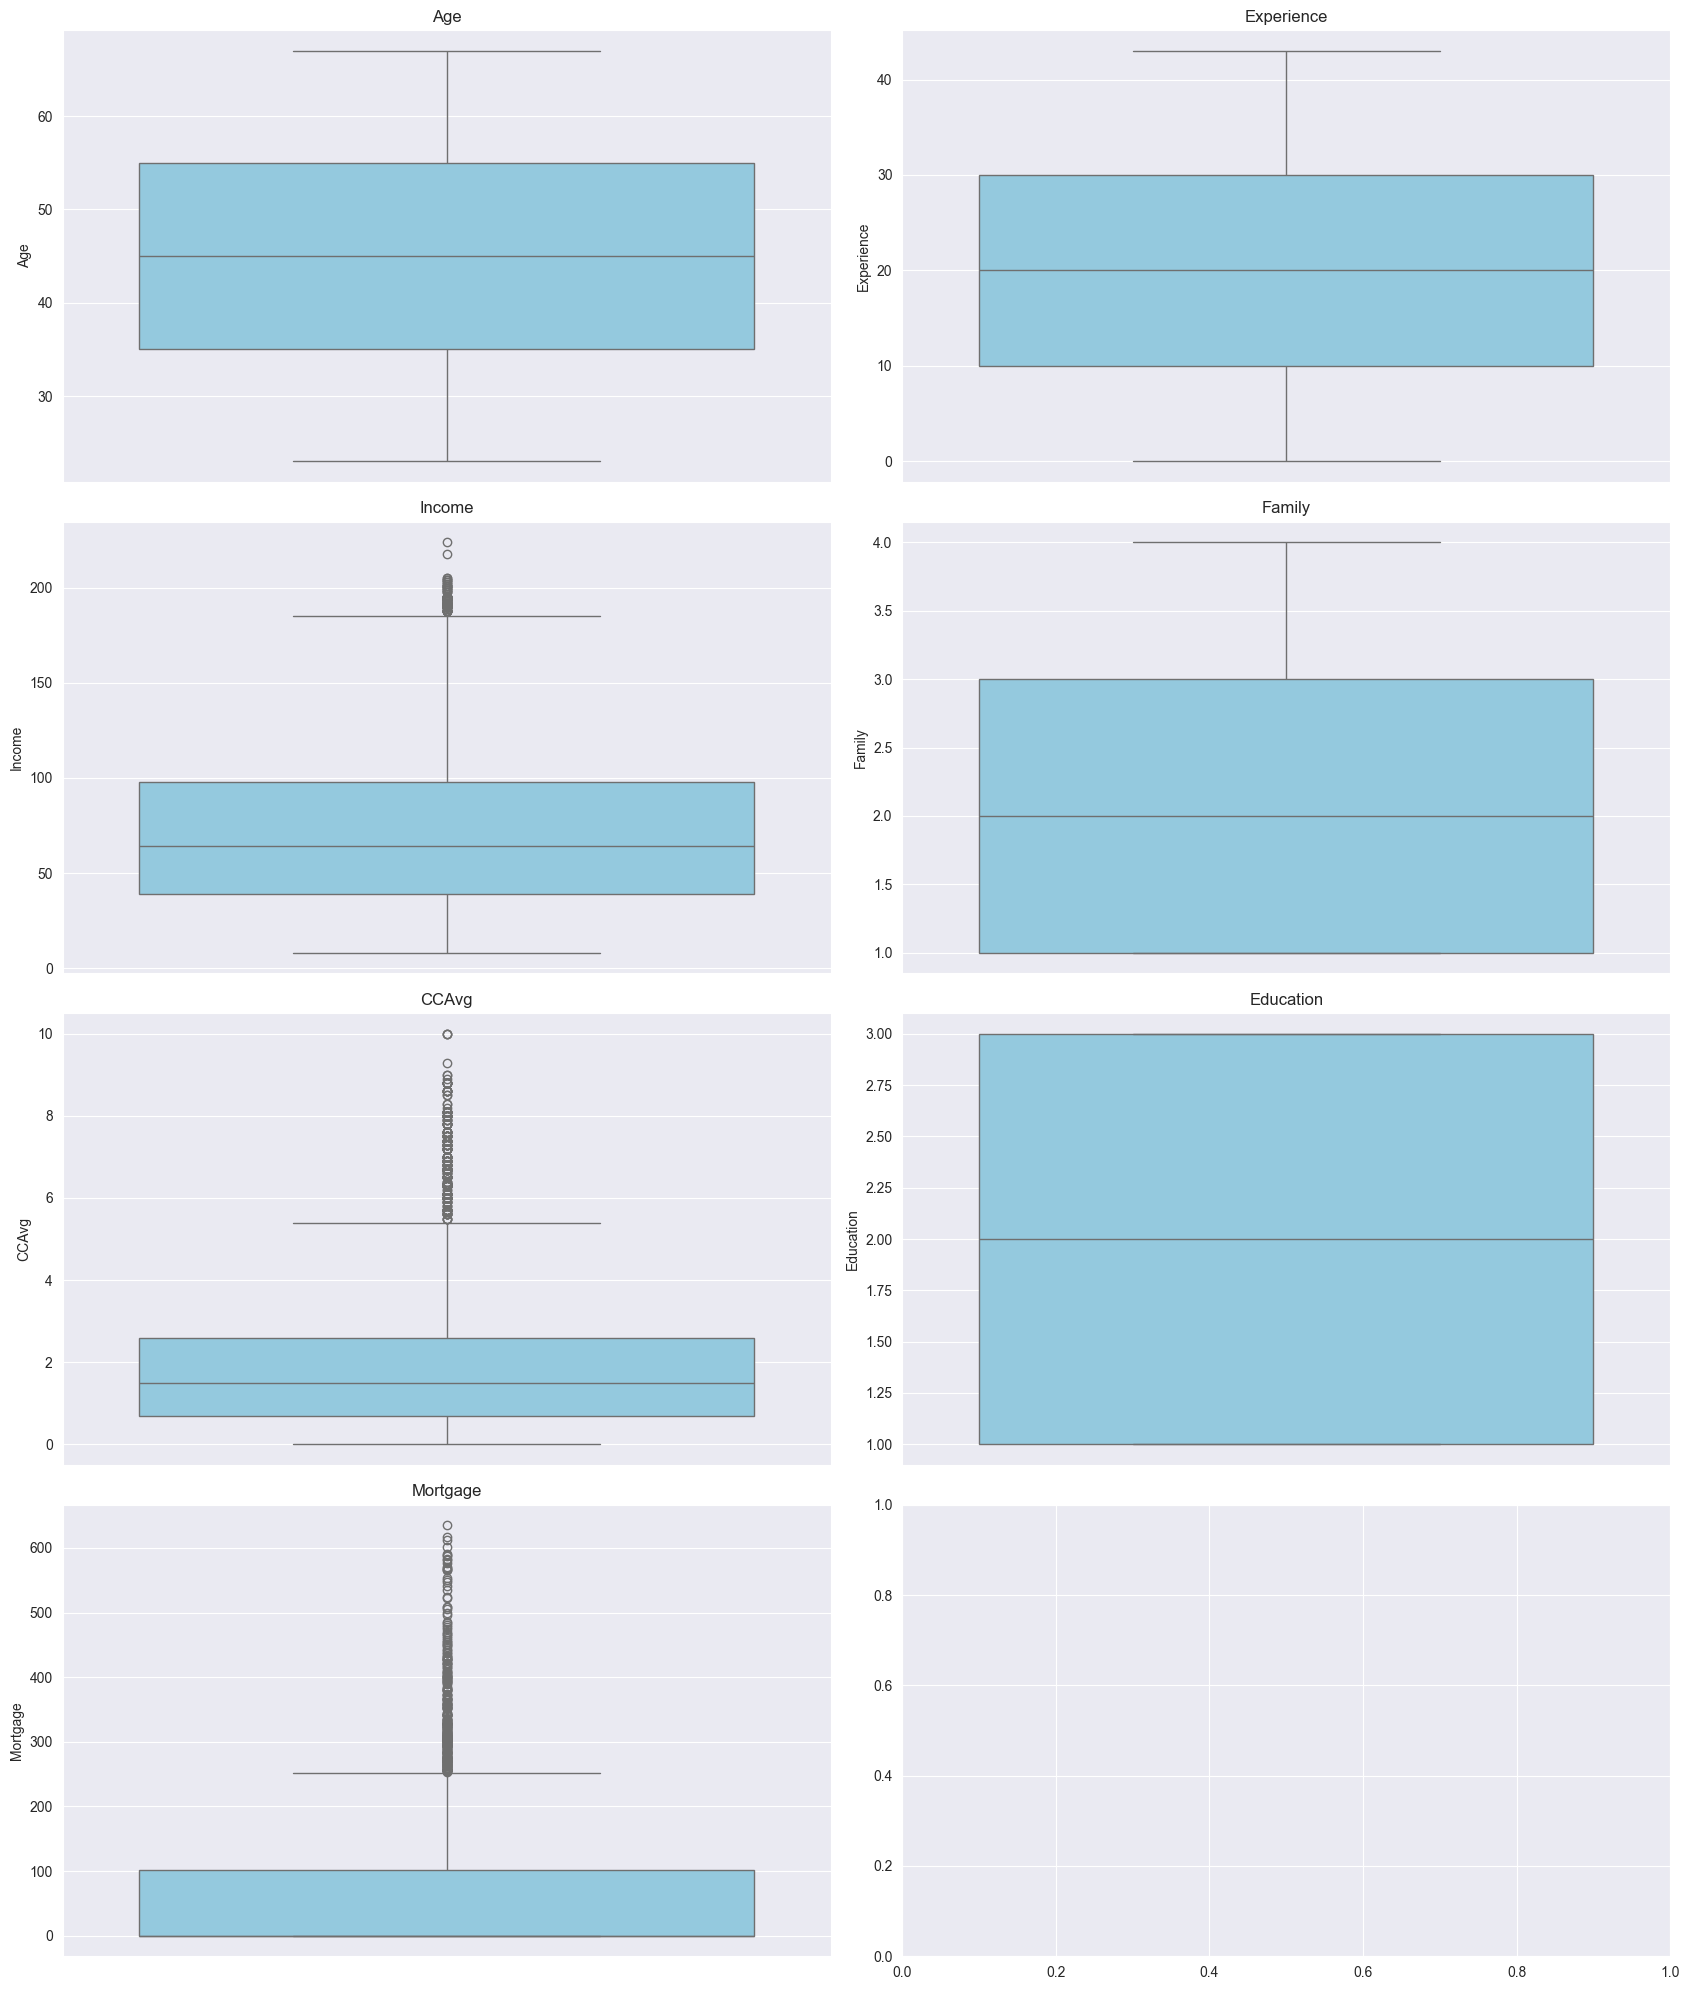

In [23]:
num_cols = len(columns.columns)
num_rows = (num_cols + 1) // 2  # Calculate the number of subplot rows

fig, axs = plt.subplots(num_rows, 2, figsize=(17, 5 * num_rows))

for i in range(num_rows):
    for j in range(2):
        col_idx = i * 2 + j
        if col_idx < num_cols:
            sns.boxplot(columns.iloc[:, col_idx], ax=axs[i, j], color='skyblue')
            axs[i, j].set_title(columns.columns[col_idx])

plt.tight_layout()
plt.show()

The box plots reveal that Age, Experience, Education, and Family columns lack outliers.

However, CCAvg, Mortgage, and Income columns exhibit a significant presence of outliers.

#### Checking for the number of outliers in these columns.

In [23]:
def find_outliers(df):

  q1=df.quantile(0.25)

  q3=df.quantile(0.75)

  IQR=q3-q1

  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

  return outliers

In [24]:
for col in columns.drop(['Age','Experience','Family','Education'],axis=1).columns:
    outliers=find_outliers(df[col])
    print("Number of outliers in",col,":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(df)),"%")
    print("\n")

Number of outliers in Income : 96 ,It's Percentage is :  1.925005013033888 %


Number of outliers in CCAvg : 301 ,It's Percentage is :  6.035692801283337 %


Number of outliers in Mortgage : 291 ,It's Percentage is :  5.835171445758974 %


## Model

### Random Forest

#### Create naive random forest

In [25]:
df = pd.read_csv("bankloan.csv")
df = df.drop(['ID', 'ZIP.Code'], axis=1)

In [28]:
from sklearn.ensemble import RandomForestClassifier


# Splitting the dataset into training and testing sets
X = df.drop('Personal.Loan', axis=1)
y = df['Personal.Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify= y)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)  # You can adjust parameters

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions on training set for f-1 calculation
y_train_pred = rf_classifier.predict(X_train)

# Get the prediction
y_test_pred = rf_classifier.predict(X_test)

# Calculate f-1 score for both training and testing sets #TP/TP+FN
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

accuracy_train, accuracy_test

(1.0, 0.992)

#### Use Cross Validation & Grid Search to find the best parameter

In [30]:
# Stratified train-test split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

# Setting up the k-fold cross-validation (with StratifiedKFold for balanced splits)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=66)

# Defining the Random Forest model
rf = RandomForestClassifier(random_state=66)

# Define the parameter distribution for Random Search
param_distributions_rf = {
    'max_depth': [i for i in range (5, 31, 1)],
    'min_samples_split': [i for i in range(2, 100, 1)],
    'min_samples_leaf': [i for i in range(2, 100, 1)],
    'max_leaf_nodes': [i for i in range(2, 101, 1)],
    'class_weight': ["balanced", None]
}

# Setup Randomized Search with specified iterations
random_search_rf = RandomizedSearchCV(rf, param_distributions_rf, n_iter=5000, cv=kfold, scoring='accuracy', n_jobs=-1, random_state=66)

# Fit Randomized Search to the data
random_search_rf.fit(X_train, y_train)

# Best parameters, score, and estimator found by Randomized Search
best_params_rf = random_search_rf.best_params_

In [31]:
print(f"Best Parameters: {best_params_rf}")

Best Parameters: {'min_samples_split': 4, 'min_samples_leaf': 3, 'max_leaf_nodes': 92, 'max_depth': 17, 'class_weight': None}


#### Learning Curves

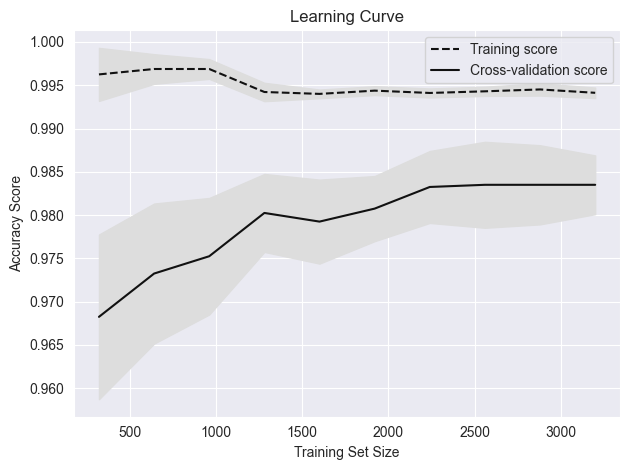

In [32]:
# Initialize the model with best parameters
best_rf_model = RandomForestClassifier(max_depth= 17, max_leaf_nodes = 92, min_samples_leaf= 3, min_samples_split= 4, class_weight= None, n_estimators=500)
# Function to plot learning curves
plot_learning_curves(best_rf_model, X, y, kfold)

#### Accuracy Score Across CV Folds

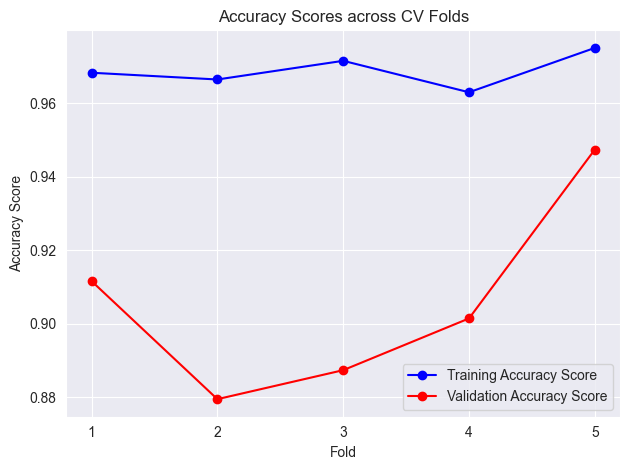

In [33]:
plot_foldwise_scores(best_rf_model, X, y, kfold)

#### Interpret the Model Metric and performance

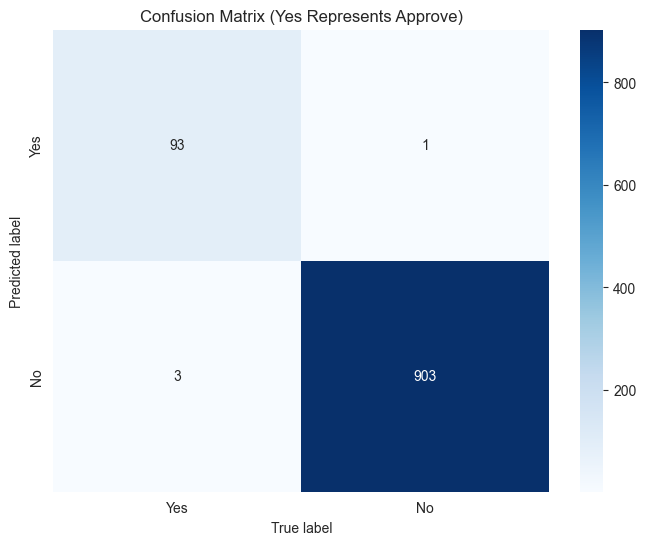

In [34]:
y_pred = best_rf_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred) 

In [35]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       0.99      0.97      0.98        96

    accuracy                           1.00      1000
   macro avg       0.99      0.98      0.99      1000
weighted avg       1.00      1.00      1.00      1000


#### Interpret Feature Importance

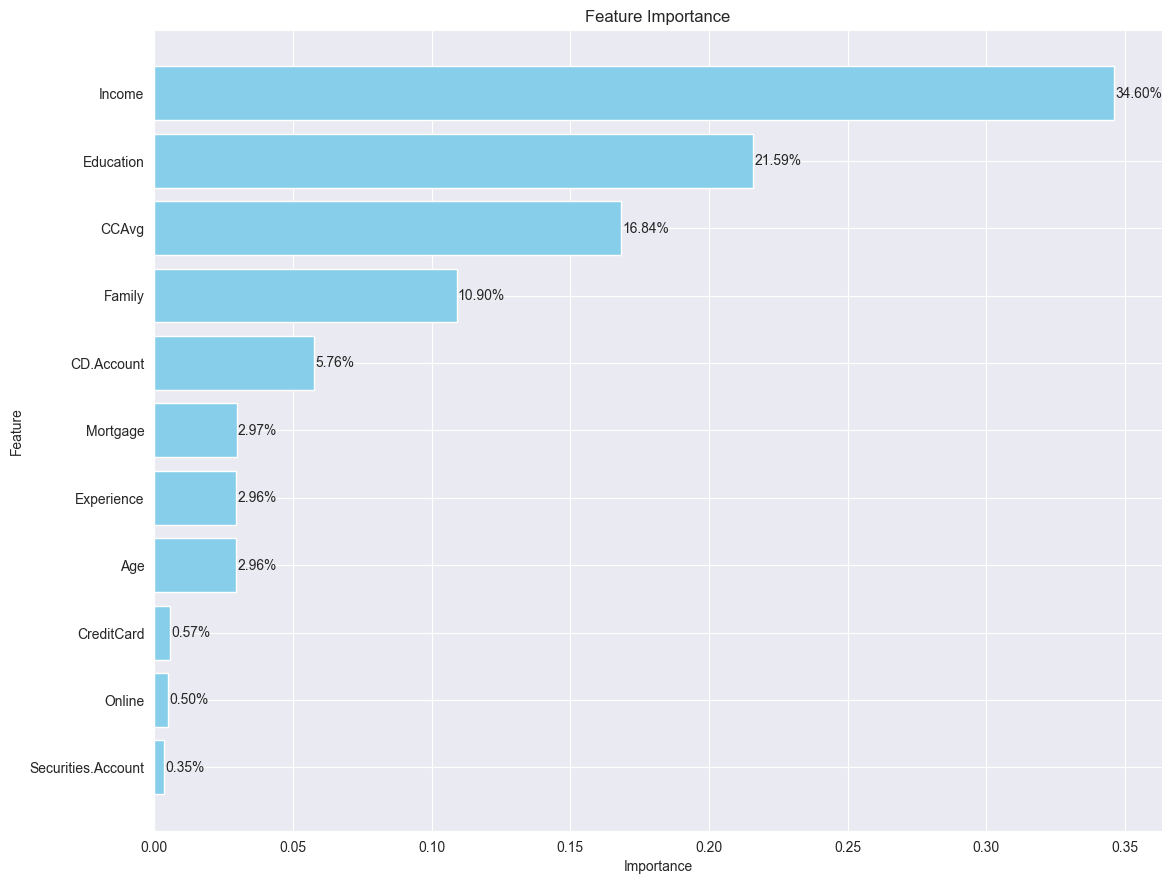

In [36]:
plot_random_forest_feature_importance(best_rf_model, X, y)

### DNN for Comparison

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df = pd.read_csv('bankloan.csv')

In [5]:
X = df.drop(['ID', 'ZIP.Code', 'Personal.Loan'], axis=1) # Assuming these columns are not features
y = df['Personal.Loan']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_test_scaled = scaler.transform(X_test)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=10, verbose=0)

2024-03-04 23:07:15.948312: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f745e2641b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-04 23:07:15.948354: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-03-04 23:07:15.956467: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-04 23:07:15.975917: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1709615236.023864     925 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [10]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

loss, accuracy

(0.09459495544433594, 0.9819999933242798)

In [11]:
from tensorflow.keras.regularizers import l1_l2

model_simple = Sequential([
    Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01), input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    Dense(1, activation='sigmoid')
])


model_simple.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [12]:
history = model_simple.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=10, verbose=0)

In [13]:
loss, accuracy = model_simple.evaluate(X_test_scaled, y_test, verbose=0)

loss, accuracy

(0.1426778882741928, 0.9779999852180481)